#  Exploratory Data Analysis


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import chart_studio.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode.iplot
#import plotly.figure_factory as ff
#init_notebook_mode(connected=True)
#import matplotlib.cm as cm
#import re
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected = True)
#import dtale
import missingno
#import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Creating DataFrame to read the Data Set
data= pd.read_csv("bank.csv")


In [6]:
data.head() # First five rows from the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#dtale.show(data)

In [5]:
#import sweetviz

In [6]:
#my_report = sweetviz.analyze([data, "Train"], target_feat='deposit')

In [7]:
#my_report.show_notebook()

In [8]:
# find number of rows and columns
data.shape

(11162, 17)

In [9]:
# describe numerical columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [7]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<25]
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("Numerical Features count {}".format(len(numerical_feature)))
print("Discrete Features count {}".format(len(discrete_feature)))
print("Continous Features count {}".format(len(continous_feature)))
print("Categorical Features count {}".format(len(categorical_feature)))



Numerical Features count 7
Discrete Features count 0
Continous Features count 7
Categorical Features count 10


In [8]:
# Checking unique values for categorical features

for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


## 1. Finding Missing Values

In [9]:
# find missing values
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


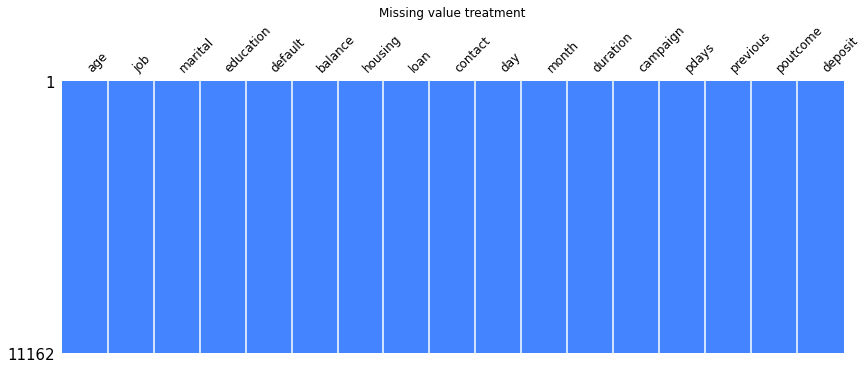

In [10]:
missingno.matrix(data, sparkline=False, figsize=(14,5), fontsize=12, color=(0.27, 0.52, 1.0));
plt.title("Missing value treatment")
plt.show()

### Take-away:

    -- No missing values found

## 2. Find features with one value(unique)

In [11]:
for column in data.columns:
    print(column,data[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


## Take-away:
      -- No Features with one unique value


### 3. Explore the Categorical Features

In [12]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is deposit and number of categories are 2


### Take-away:
     -- There are 9 categorical features.
     -- Features job and month has highest number of categorical values

### 4. Categorical Feature Distribution

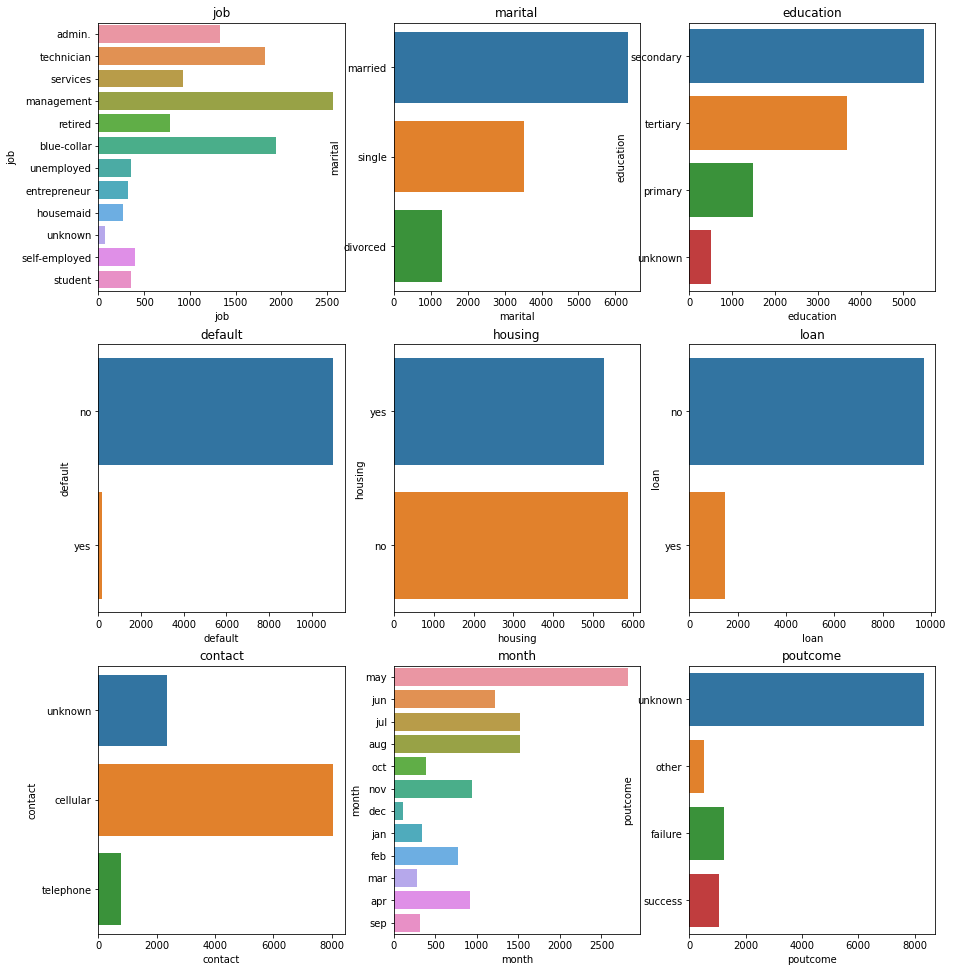

In [14]:
#check count based on categorical features


plt.figure(figsize=(15,70), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Take-away:

    -- client with job type as management records are high in given dataset and housemaid are very less
    -- client who married are high in records in given dataset and divorced are less
    -- client whoes education background is secondary are in high numbers in given dataset
    -- defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can             drop
    -- data in month of may is high and less in dec

### 5. Relationship between Categorical Features and target variable(dependent Variable)

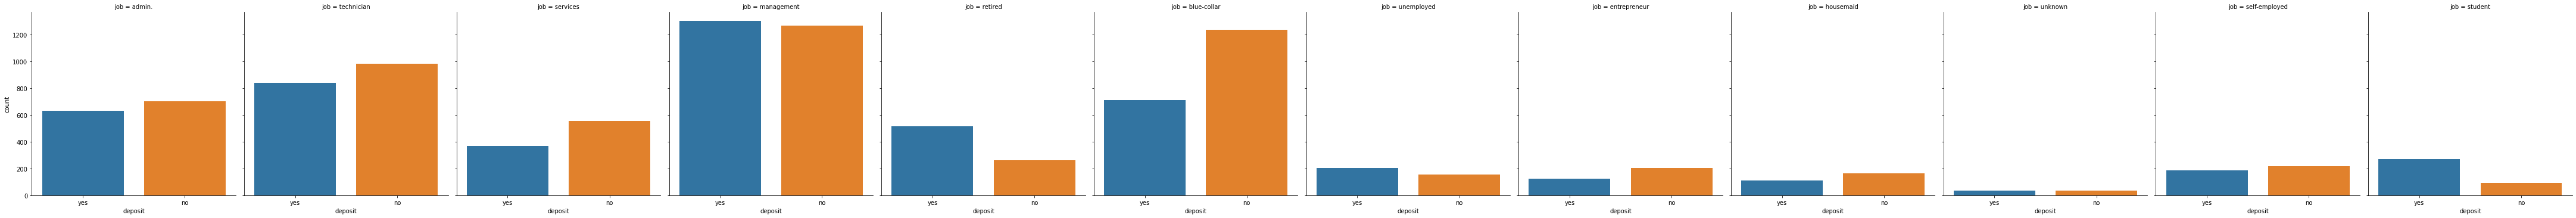

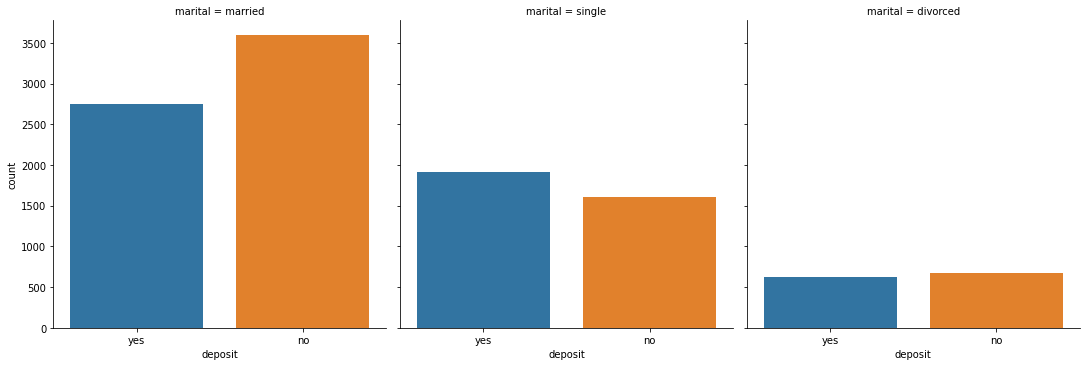

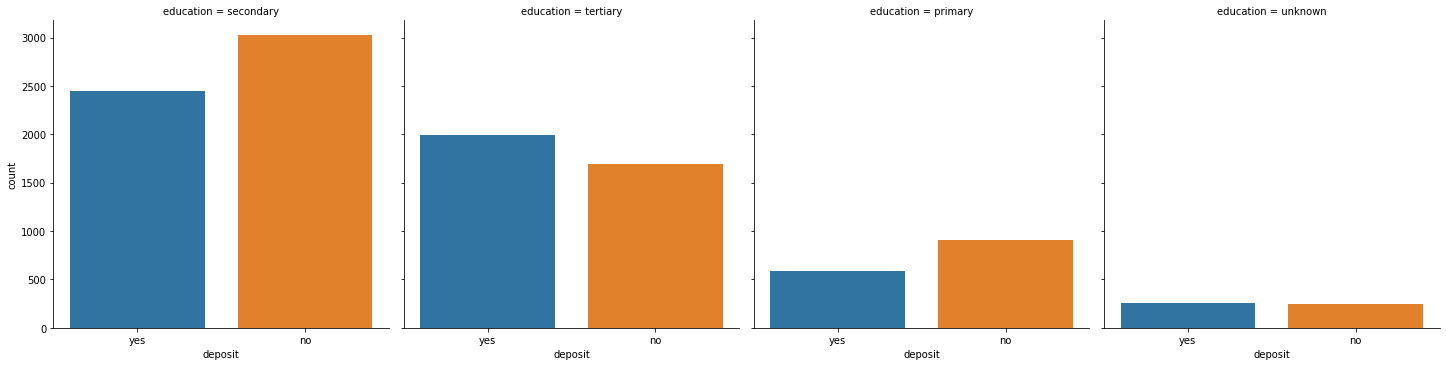

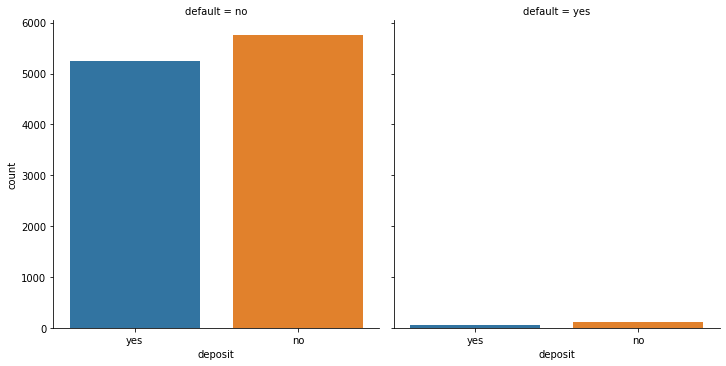

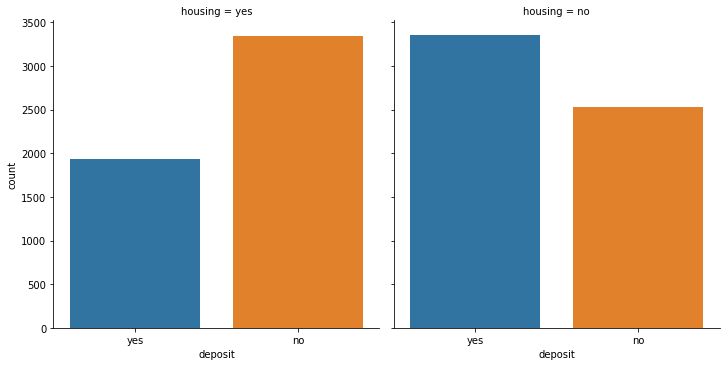

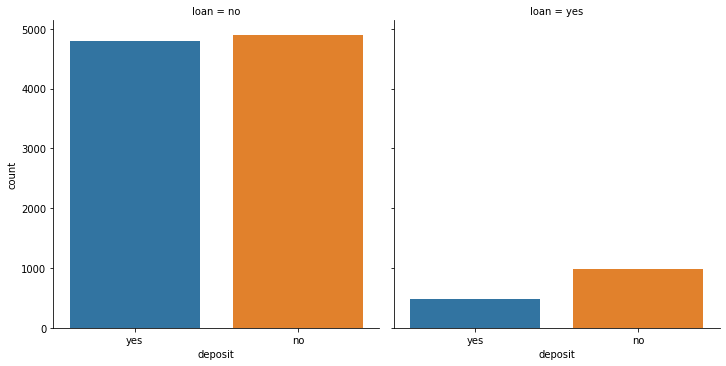

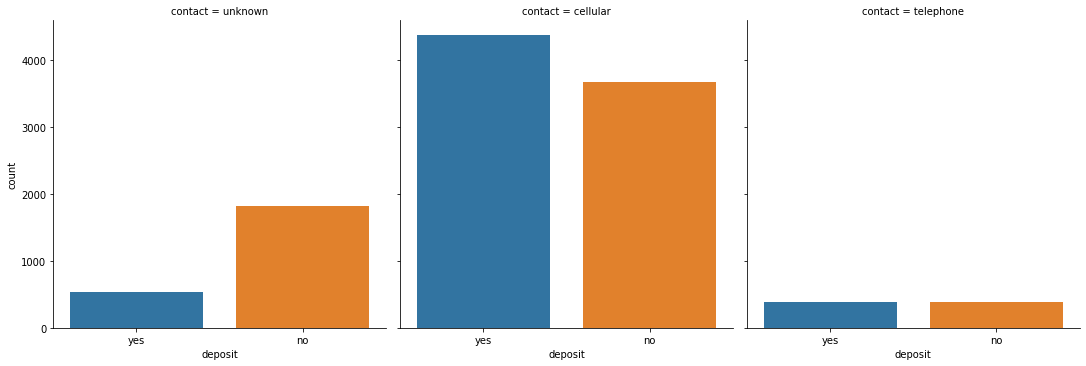

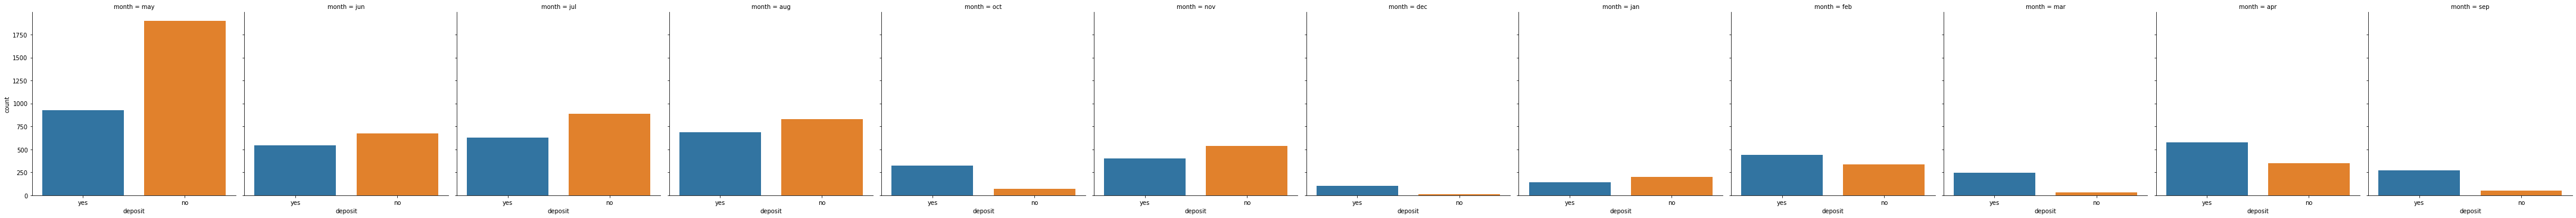

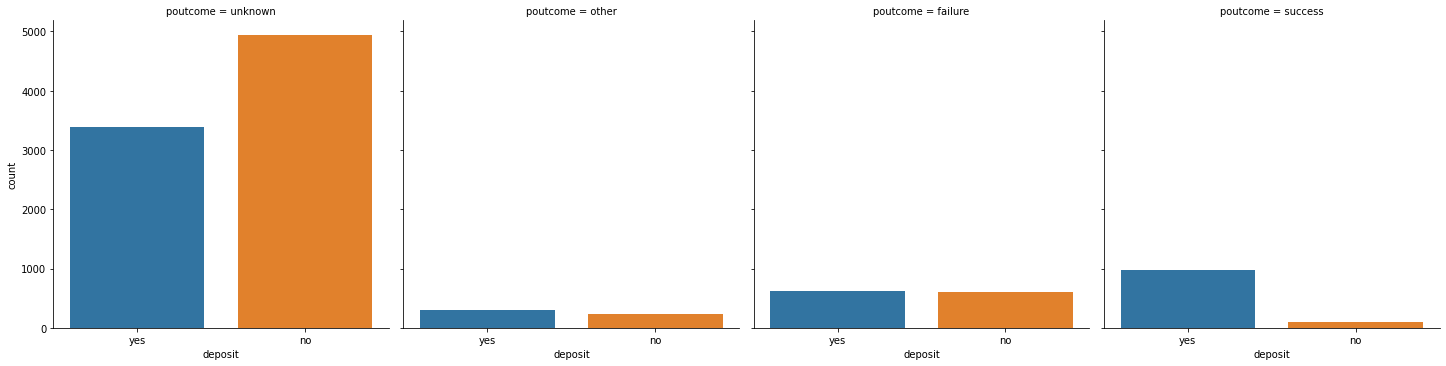

In [15]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= data)
plt.show()

In [16]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(data.groupby(['deposit',categorical_feature]).size())


deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

### Take-away:
    -- retired client has high interest on deposit
    -- client who has housing loan seems to be not interested much on deposit
    -- If poutcome=success then, there is high chance of client to show interest on deposit
    -- In month of March, September, October and December, client show high interest to deposit
    -- In month of may, records are high but client interst ratio is very less

### 6. Explore the Numerical Features

In [17]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


### Take-away:
     -- There are 7 numerical features

### 7. Find Discrete Numerical Features

In [18]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


### Take-away:
     -- There is no Discrete Variables in give dataset

### 8. Find Continous Numerical Features

In [19]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


### Take-away:
     -- There are 7 continuous numerical features


### 9. Distribution of Continous Numerical Features

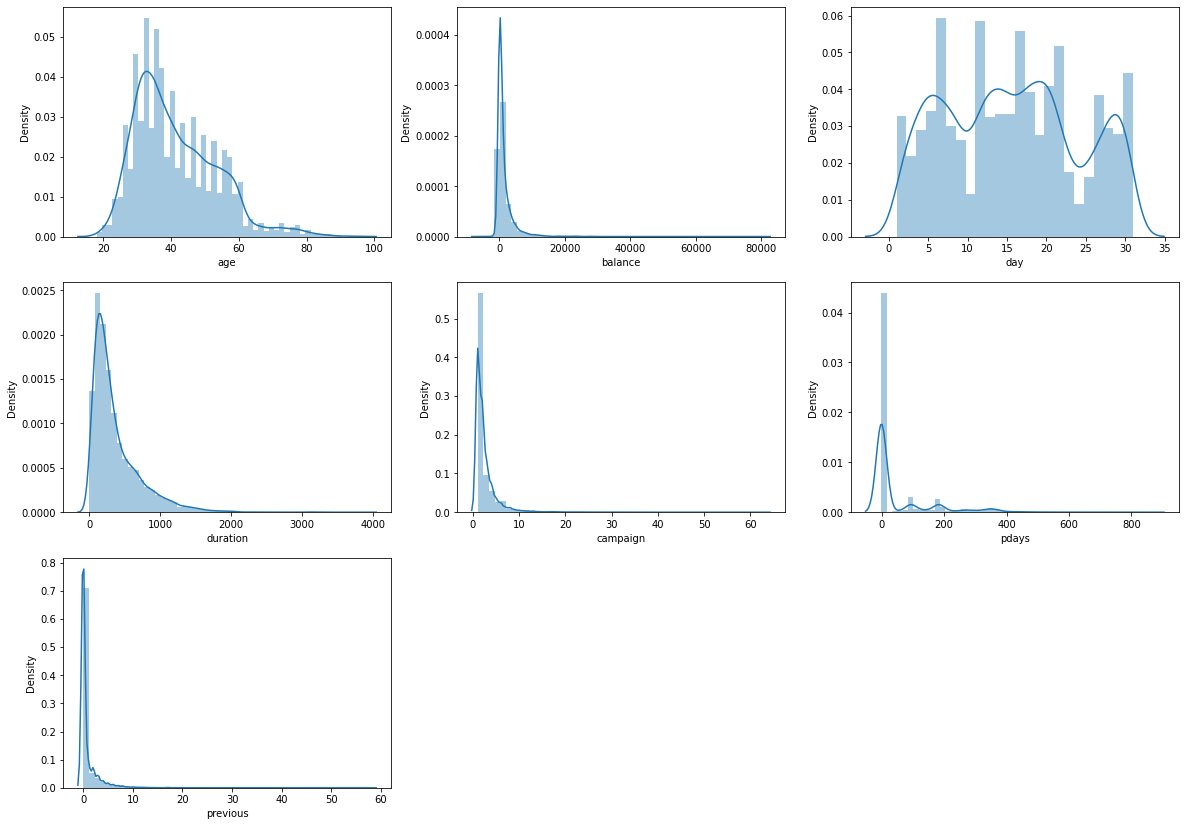

In [20]:
#plot a univariate distribution of continues observations
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

### Take-away:
     -- It seems age, days distributed normally
     -- balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

### 11. Relation between Continous numerical Features and Labels

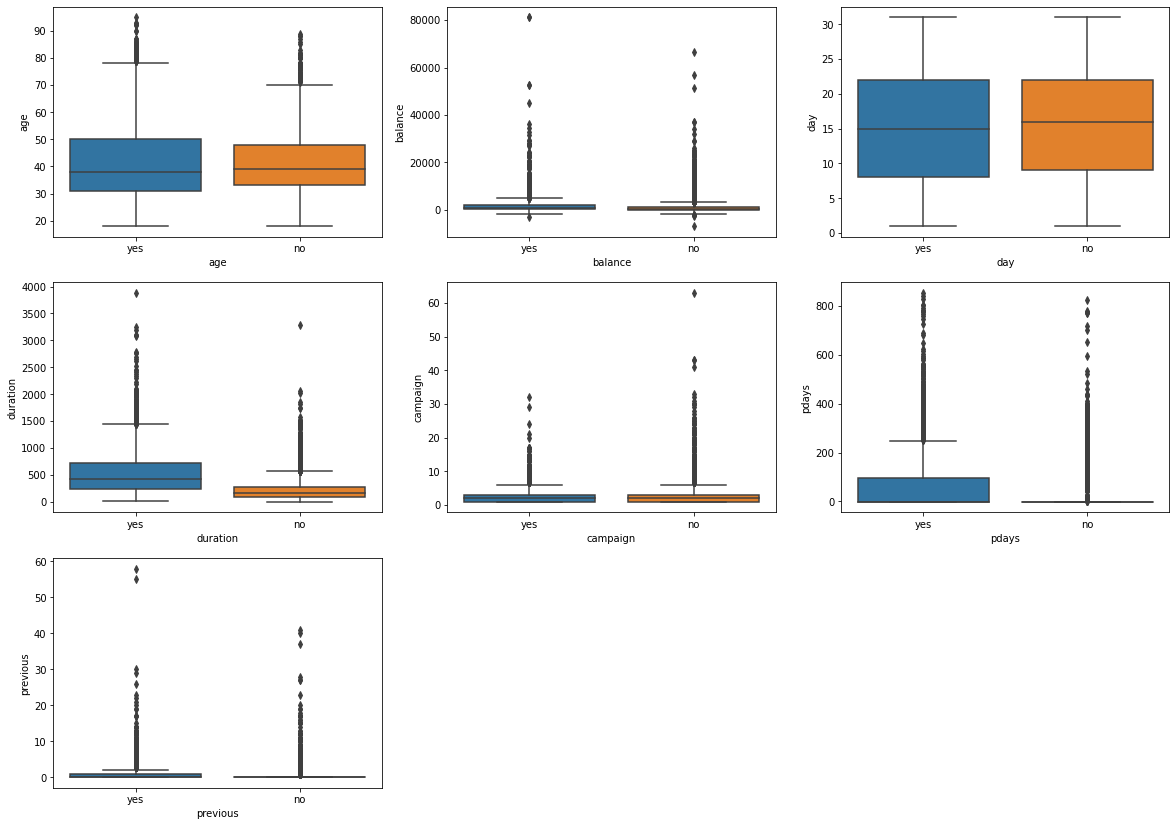

In [21]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= data[feature], data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

### Take-away:
    -- client shows interest on deposit who had discussion for longer duration

### 12. Find Outliers in numerical features



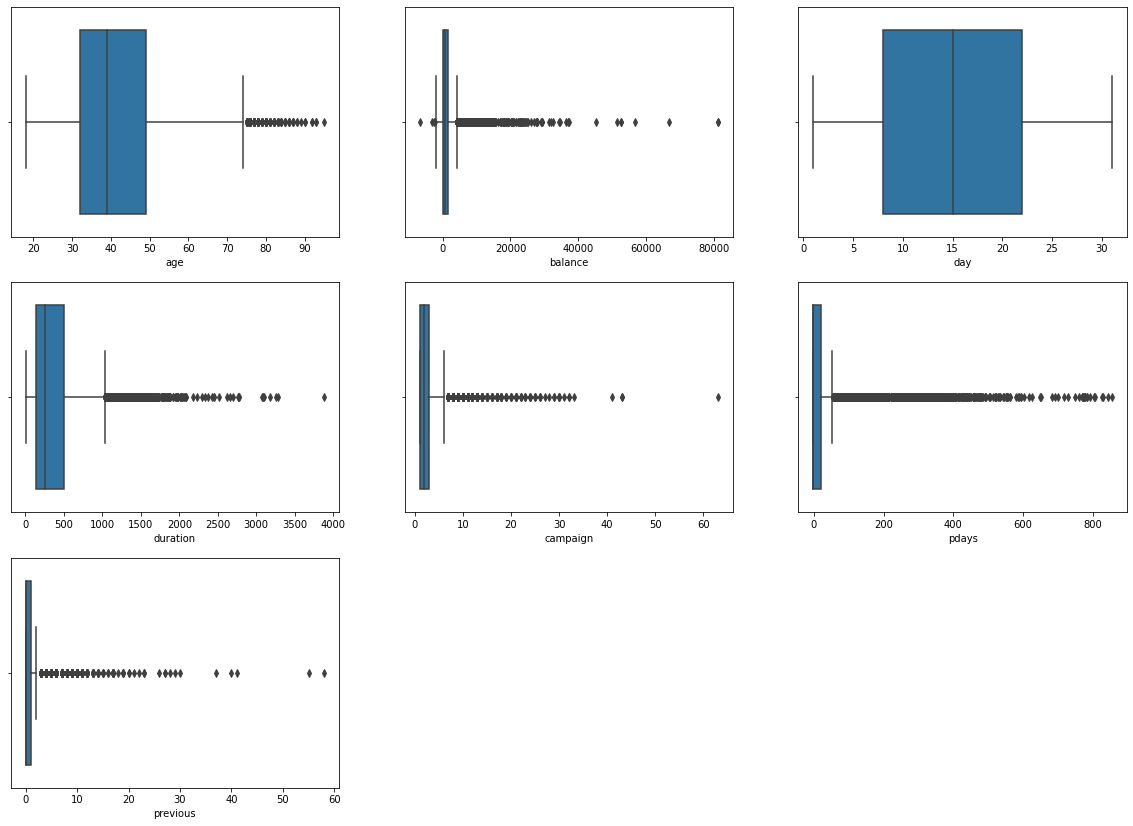

In [22]:
#boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Take-away:
     -- age, balance, duration, compaign, pdays and previous has some outliers


### Removing outliers from numerical Features

In [23]:
# Age

IQR = data.age.quantile(0.75)-data.age.quantile(0.25)
lower_limit = data.age.quantile(0.25)-(IQR*1.5)
upper_limit = data.age.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

6.5 74.5


In [24]:
data.loc[data['age']>=74.5,'age']=74.5
data.loc[data['age']<=6.5,'age']=6.5

In [25]:
# Balance

IQR = data.balance.quantile(0.75)-data.balance.quantile(0.25)
lower_limit = data.balance.quantile(0.25)-(IQR*1.5)
upper_limit = data.balance.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-2257.0 4087.0


In [26]:
data.loc[data['balance']>=4087,'balance']=4087
data.loc[data['balance']<=-2257,'balance']=-2257

In [27]:
IQR = data.campaign.quantile(0.75)-data.campaign.quantile(0.25)
lower_limit = data.campaign.quantile(0.25)-(IQR*1.5)
upper_limit = data.campaign.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-2.0 6.0


In [28]:
data.loc[data['campaign']>=6,'campaign']=6
data.loc[data['campaign']<=-2,'campaign']=-2

In [29]:
IQR = data.duration.quantile(0.75)-data.duration.quantile(0.25)
lower_limit = data.duration.quantile(0.25)-(IQR*1.5)
upper_limit = data.duration.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-399.0 1033.0


In [30]:
data.loc[data['duration']>=1033,'duration']=1033
data.loc[data['duration']<=-399,'duration']=-399

In [31]:
IQR = data.pdays.quantile(0.75)-data.pdays.quantile(0.25)
lower_limit = data.pdays.quantile(0.25)-(IQR*1.5)
upper_limit = data.pdays.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-33.625 53.375


In [32]:
data.loc[data['pdays']>=53.375,'pdays']=53.375
data.loc[data['pdays']<=-33.625,'pdays']=-33.625

In [33]:
IQR = data.previous.quantile(0.75)-data.previous.quantile(0.25)
lower_limit = data.previous.quantile(0.25)-(IQR*1.5)
upper_limit = data.previous.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-1.5 2.5


In [34]:
data.loc[data['previous']>=2.5,'previous']=2.5
data.loc[data['previous']<=-1.5,'previous']=-1.5

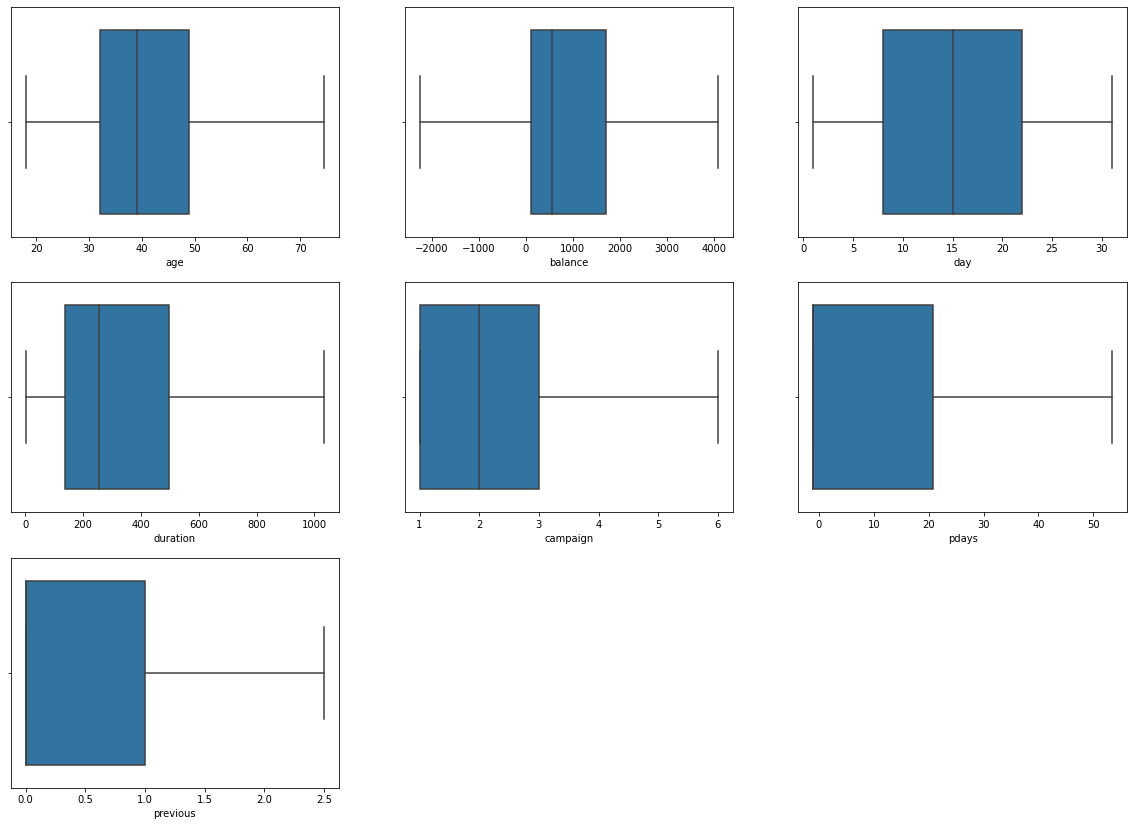

In [35]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [36]:
def qq_plots(data, variable):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[variable], dist ="norm", plot = plt)
    plt.show()

age


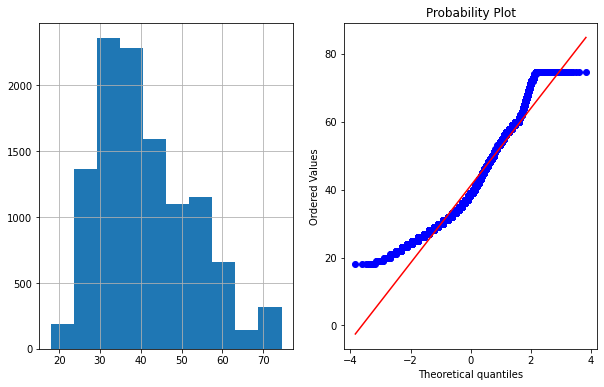

balance


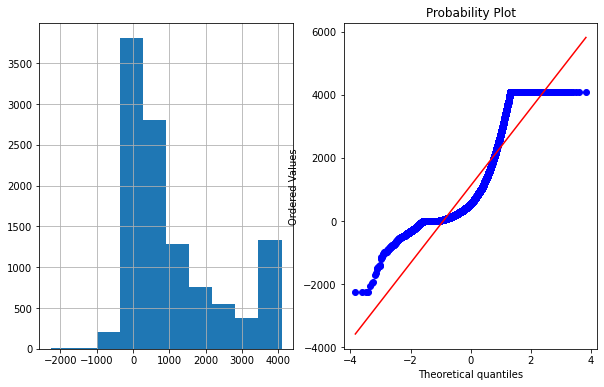

day


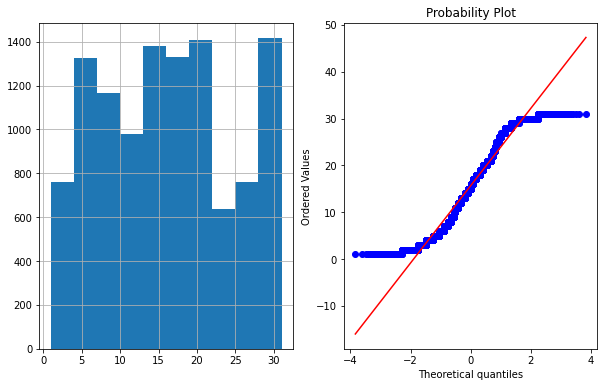

duration


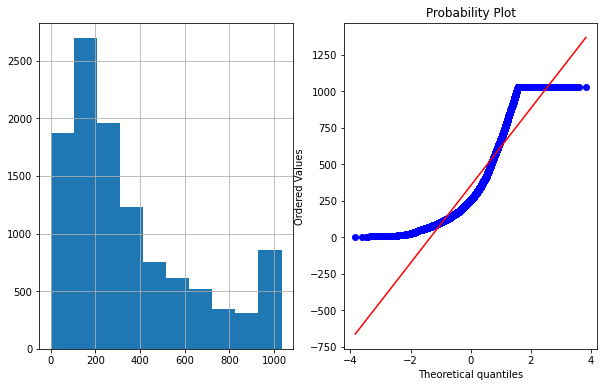

campaign


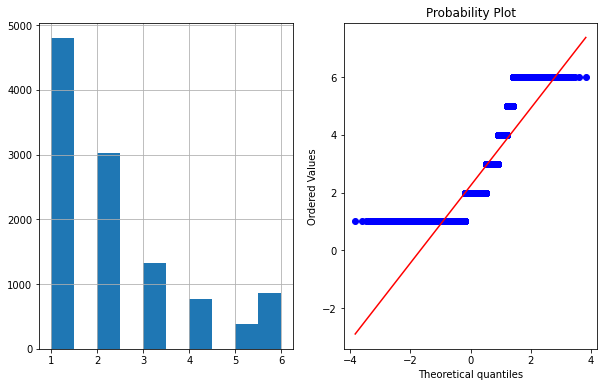

pdays


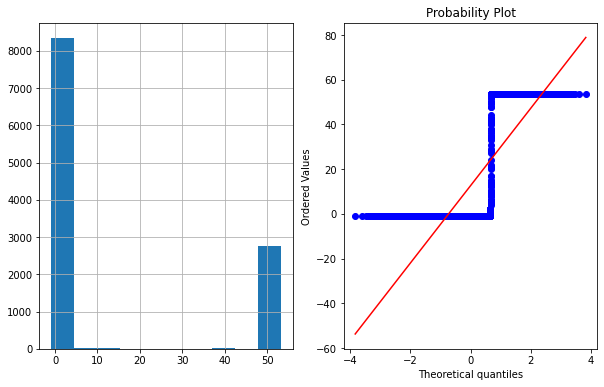

previous


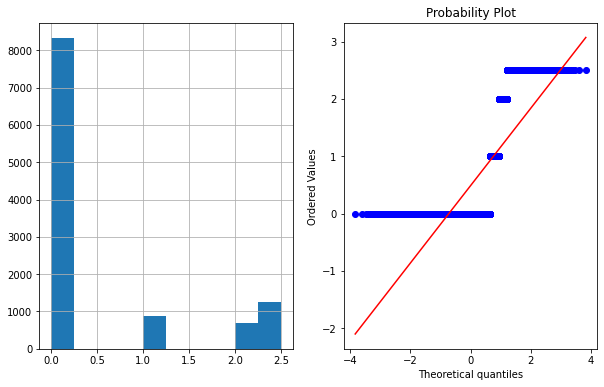

In [37]:
import scipy.stats as stats
for feature in continuous_features:
    print(feature)
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist ="norm", plot = plt)
    plt.show()
    

### Visualize the realation between age and balance

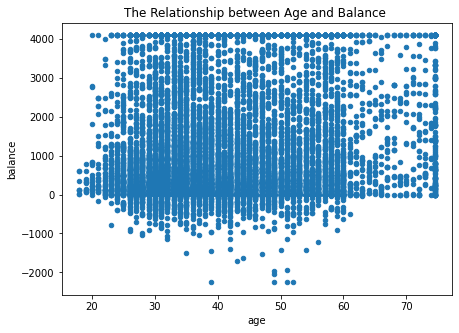

In [38]:
scatter_age_balance = data.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

### Take-away:
     -- There is no clear relationship between client’s age and balance level.
     -- over the age of 60, clients tend to have a significantly lower balance, 

### 13. Explore the Correlation between numerical features



<AxesSubplot:>

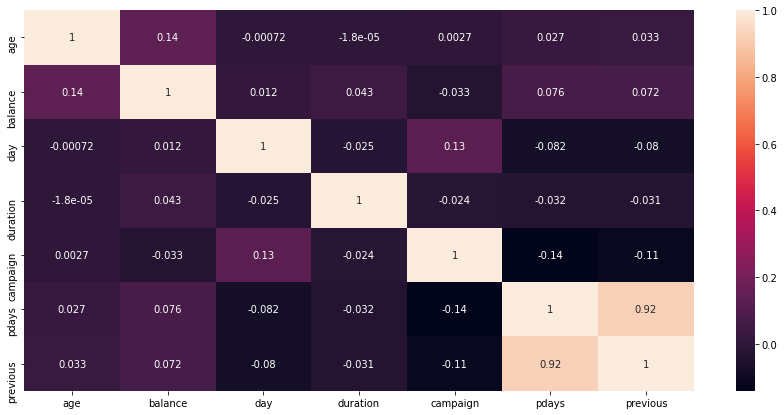

In [39]:
## Checking for correlation
cor_mat=data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

### Take-away:
   -- it seems no feature is heavily correlated with other features


### 14. Check the Data set is balanced or not based on target values in classification




In [40]:
fig = px.histogram(data, x="deposit", height = 400, width = 500)
fig.show()

NameError: name 'px' is not defined

In [46]:
data['deposit'].groupby(data['deposit']).count()      


deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [41]:
#defaut features does not play imp role
data.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [42]:
# Droping the default feature(It does not make positive signs for insights)

data.drop(['default','pdays'],axis=1, inplace=True)

<H4> Take_away:
<h4>   -- given dataset seems to be balanced.



In [49]:
df = data.copy()

In [50]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,2343,yes,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,45,no,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,1270,yes,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
3,55.0,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1.0,0.0,unknown,yes
4,54.0,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1.0,0.0,unknown,yes


In [51]:
# Deposit VS Pdays

df.groupby(['deposit','pdays']).size()


deposit  pdays  
no       -1.000     4940
          1.000        2
          2.000        6
          5.000        2
          6.000        2
          8.000        2
          9.000        4
          12.000       1
          14.000       3
          15.000       1
          17.000       1
          21.000       1
          24.000       1
          28.000       2
          41.000       1
          42.000       2
          43.000       1
          50.000       2
          53.375     899
yes      -1.000     3384
          1.000        6
          2.000        2
          4.000        1
          6.000        1
          9.000        3
          10.000       4
          13.000       3
          14.000       1
          17.000       1
          20.000       1
          21.000       1
          22.000       1
          27.000       1
          28.000       1
          29.000       1
          31.000       1
          33.000       1
          34.000       1
          35.000       3
        

In [52]:
# droping  pdays as it has -1 value for around 40% of the dataset


df.drop(['pdays'],axis=1, inplace=True)

In [53]:
df.groupby(['deposit','age'],sort=True)['age'].count()


deposit  age 
no       18.0      1
         19.0      2
         20.0      5
         21.0      8
         22.0      8
                ... 
yes      71.0     25
         72.0     24
         73.0     24
         74.0     13
         74.5    132
Name: age, Length: 116, dtype: int64

In [54]:
# remove outliers in feature balance...

df.groupby(['deposit','balance'],sort=True)['balance'].count()

# as balance goes high, client show interest on deposit

deposit  balance
no       -2257        3
         -2049        1
         -1965        1
         -1701        1
         -1636        1
                   ... 
yes       4068        1
          4069        1
          4071        1
          4079        1
          4087      604
Name: balance, Length: 4201, dtype: int64

In [55]:
# remove outliers in feature duration...

df.groupby(['deposit','duration'],sort=True)['duration'].count()

#  as duration goes high, client show interest on deposit

deposit  duration
no       2             1
         3             1
         4             2
         5             4
         6             6
                    ... 
yes      1029          1
         1030          4
         1031          1
         1032          5
         1033        573
Name: duration, Length: 1702, dtype: int64

In [56]:
df['deposit_bool'] = np.where(df.deposit=='yes',1,0)
df.deposit_bool.value_counts()

0    5873
1    5289
Name: deposit_bool, dtype: int64

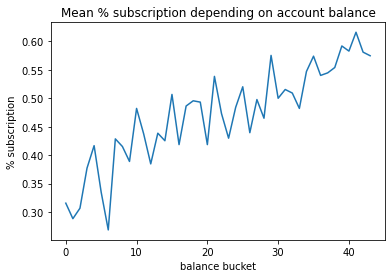

In [57]:
#df_new = cleaned_df.copy()

#introduce new column 'balance_buckets' to  ''
df['balance_buckets'] = pd.qcut(df['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df.groupby(['balance_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [58]:
df[df['balance_buckets'] == 31]['balance'].min()


1128

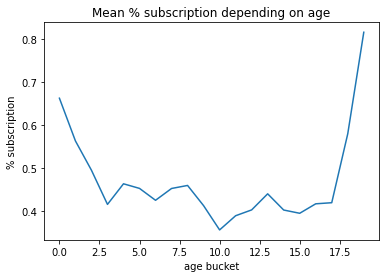

In [59]:
#introduce new column 'age_buckets' to  ''
df['age_buckets'] = pd.qcut(df['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [60]:
df[df['age_buckets'] == 3]['age'].max()


31.0

In [61]:
df[df['age_buckets'] == 18]['age'].min()


59.0

### Take-away:
     -- So we see that average subscrition rate tends to be higher for customers below 31 years old or above 56 years old.

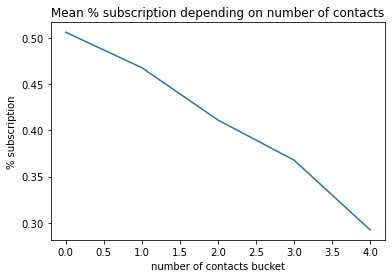

In [62]:

df['campaign_buckets'] = pd.qcut(df['campaign'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df.groupby(['campaign_buckets'])['deposit_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [63]:
df[df['campaign_buckets'] == 2]['campaign'].min()


4

<h4> From the plot above we see that average subscription rate is below 50% if the number of contacts during the campaign exceeds 4.

### Insights from above plots.
    -- The customer's account balance has a huge influence on the campaign's outcome. People with account balance above           1128 are more likely to subscribe for term deposit.
    -- Future campains should concentrate on customers from age categories below 30 years old and above 58 years old(age<30 or age>58).
    -- The number of contacts with the customer shouldn't exceed 4. Too many contacts with the customer could make him             decline the offer.
    -- The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.
    -- In job Category target students and retired clients.

In [43]:
data.nunique()

age            58
job            12
marital         3
education       4
balance      2970
housing         2
loan            2
contact         3
day            31
month          12
duration     1013
campaign        6
previous        4
poutcome        4
deposit         2
dtype: int64

In [44]:
data["loan"] = pd.get_dummies(data["loan"], drop_first = True)
data["housing"] = pd.get_dummies(data["housing"], drop_first = True)
data["deposit"] = pd.get_dummies(data["deposit"], drop_first = True)

data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59.0,admin.,married,secondary,2343,1,0,unknown,5,may,1033,1,0.0,unknown,1
1,56.0,admin.,married,secondary,45,0,0,unknown,5,may,1033,1,0.0,unknown,1
2,41.0,technician,married,secondary,1270,1,0,unknown,5,may,1033,1,0.0,unknown,1
3,55.0,services,married,secondary,2476,1,0,unknown,5,may,579,1,0.0,unknown,1
4,54.0,admin.,married,tertiary,184,0,0,unknown,5,may,673,2,0.0,unknown,1


In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,deposit_bool,balance_buckets,age_buckets,campaign_buckets
0,59.0,admin.,married,secondary,no,2343,1,0,unknown,5,...,1042,1,-1,0,unknown,yes,1,38,18,0
1,56.0,admin.,married,secondary,no,45,0,0,unknown,5,...,1467,1,-1,0,unknown,yes,1,7,17,0
2,41.0,technician,married,secondary,no,1270,1,0,unknown,5,...,1389,1,-1,0,unknown,yes,1,32,11,0
3,55.0,services,married,secondary,no,2476,1,0,unknown,5,...,579,1,-1,0,unknown,yes,1,39,16,0
4,54.0,admin.,married,tertiary,no,184,0,0,unknown,5,...,673,2,-1,0,unknown,yes,1,12,16,0


In [67]:
for feature in categorical_features:
    print(feature, (data.groupby([feature])["deposit"].mean().sort_values(ascending = False)).index)

job Index(['student', 'retired', 'unemployed', 'management', 'unknown', 'admin.',
       'self-employed', 'technician', 'services', 'housemaid', 'entrepreneur',
       'blue-collar'],
      dtype='object', name='job')
marital Index(['single', 'divorced', 'married'], dtype='object', name='marital')
education Index(['tertiary', 'unknown', 'secondary', 'primary'], dtype='object', name='education')


KeyError: 'default'

In [45]:
job = {'student':0, 'retired':1, 'unemployed':2, 'management':3, 'unknown':4, 'admin.':5,
       'self-employed':6, 'technician':7, 'services':8, 'housemaid':9, 'entrepreneur':10,
       'blue-collar':11}
marital = {'single':0, 'divorced':1, 'married':2}
education = {'tertiary':0, 'unknown':1, 'secondary':2, 'primary':3}
contact = {'cellular':0, 'telephone':1, 'unknown':2}
month = {'dec':12, 'mar':3, 'sep':9, 'oct':10, 'apr':4, 'feb':2, 'aug':8, 'jun':6, 'nov':11, 'jul':7,
       'jan':1, 'may':5}
poutcome = {'success':0, 'other':1, 'failure':2, 'unknown':3}

data["job"] = data["job"].map(job)
data["marital"] = data["marital"].map(marital)
data["education"] = data["education"].map(education)
data["contact"] = data["contact"].map(contact)
data["month"] = data["month"].map(month)
data["poutcome"] = data["poutcome"].map(poutcome)


In [68]:
data.describe()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.152347,5.899032,1.253808,1.428866,1117.352804,0.473123,0.130801,0.489697,15.658036,6.190826,352.948486,2.238577,0.485397,2.505913,0.473840
std,11.659113,3.340504,0.905437,1.083885,1349.670734,0.499299,0.337198,0.818724,8.420740,2.572792,284.714889,1.521158,0.892563,0.960193,0.499338
min,18.000000,0.000000,0.000000,0.000000,-2257.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,3.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,138.000000,1.000000,0.000000,2.000000,0.000000
50%,39.000000,6.000000,2.000000,2.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,0.000000,3.000000,0.000000
75%,49.000000,8.000000,2.000000,2.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,1.000000,3.000000,1.000000
max,74.500000,11.000000,2.000000,3.000000,4087.000000,1.000000,1.000000,2.000000,31.000000,12.000000,1033.000000,6.000000,2.500000,3.000000,1.000000


In [46]:
data["job"] = data["job"].fillna(data["job"].value_counts().index[0])
data["marital"] = data["marital"].fillna(data["marital"].value_counts().index[0])
data["education"] = data["education"].fillna(data["education"].value_counts().index[0])
data["contact"] = data["contact"].fillna(data["contact"].value_counts().index[0])
data["month"] = data["month"].fillna(data["month"].value_counts().index[0])
data["poutcome"] = data["poutcome"].fillna(data["poutcome"].value_counts().index[0])


In [47]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59.0,5,2,2,2343,1,0,2,5,5,1033,1,0.0,3,1
1,56.0,5,2,2,45,0,0,2,5,5,1033,1,0.0,3,1
2,41.0,7,2,2,1270,1,0,2,5,5,1033,1,0.0,3,1
3,55.0,8,2,2,2476,1,0,2,5,5,579,1,0.0,3,1
4,54.0,5,2,0,184,0,0,2,5,5,673,2,0.0,3,1


In [67]:
data.job.unique()


array([ 5,  7,  8,  3,  1, 11,  2, 10,  9,  4,  6,  0], dtype=int64)

In [65]:
data.describe()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.152347,5.899032,1.253808,1.428866,1117.352804,0.473123,0.130801,0.489697,15.658036,6.190826,352.948486,2.238577,0.485397,2.505913,0.473840
std,11.659113,3.340504,0.905437,1.083885,1349.670734,0.499299,0.337198,0.818724,8.420740,2.572792,284.714889,1.521158,0.892563,0.960193,0.499338
min,18.000000,0.000000,0.000000,0.000000,-2257.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,3.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,138.000000,1.000000,0.000000,2.000000,0.000000
50%,39.000000,6.000000,2.000000,2.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,0.000000,3.000000,0.000000
75%,49.000000,8.000000,2.000000,2.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,1.000000,3.000000,1.000000
max,74.500000,11.000000,2.000000,3.000000,4087.000000,1.000000,1.000000,2.000000,31.000000,12.000000,1033.000000,6.000000,2.500000,3.000000,1.000000


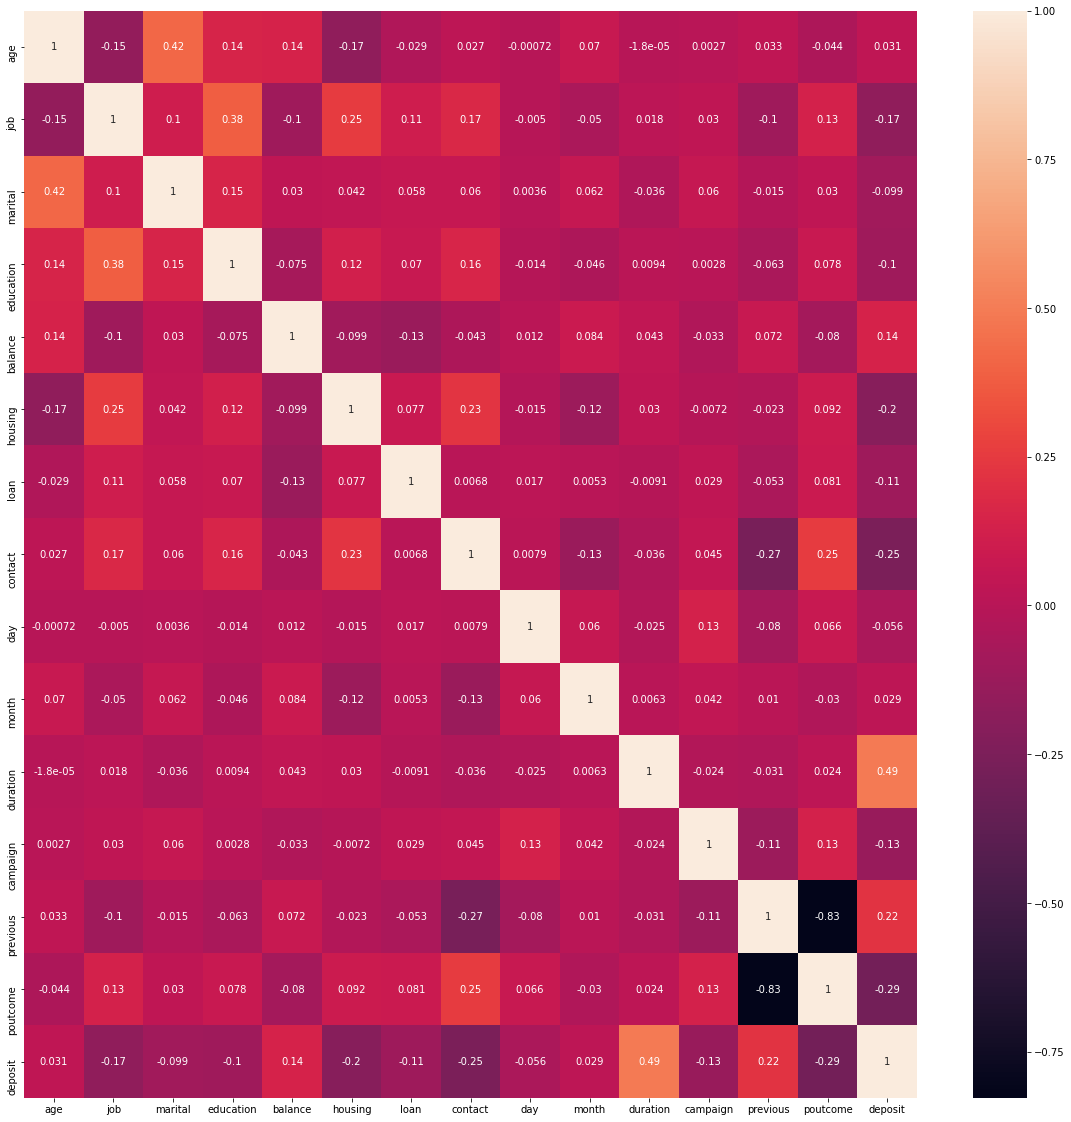

In [48]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [52]:
data.to_csv("D:\\python datasets\\archive\\preprocessed_2.csv", index=False)


In [53]:
data_1 = pd.read_csv("D:\\python datasets\\archive\\preprocessed_2.csv")

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics


In [55]:
X = data_1.drop(["deposit"], axis=1)
y = data_1["deposit"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state = 0)


In [57]:
y_train.shape,y_test.shape

((8929,), (2233,))

In [58]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))


[[999 206]
 [142 886]]
0.8441558441558441
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1205
           1       0.81      0.86      0.84      1028

    accuracy                           0.84      2233
   macro avg       0.84      0.85      0.84      2233
weighted avg       0.85      0.84      0.84      2233



0.8454566737168412

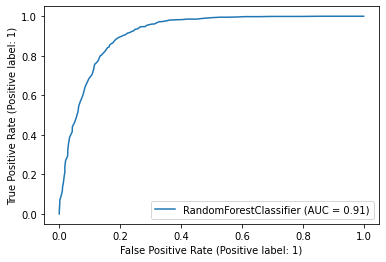

In [60]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

In [98]:
import joblib

joblib.dump(rf, "rf.pkl")


['rf.pkl']

In [61]:
import pickle  

In [62]:
file = open('random_forest_classifier_model.pkl', 'wb')

# dump information to that file

pickle.dump(rf, file)